In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
data_aisles = pd.read_csv("D:/project-internship/aisles.csv/aisles.csv")
data_departments = pd.read_csv("D:/project-internship/departments.csv/departments.csv")
data_order_products = pd.read_csv("D:/project-internship/order_products__prior.csv/order_products__prior.csv")
data_orders = pd.read_csv("D:/project-internship/orders.csv/orders.csv")
data_products = pd.read_csv("D:/project-internship/products.csv/products.csv")

In [3]:
data_aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [4]:
data_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [5]:
    data_products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [6]:
data_order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [7]:
data_orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [8]:
#merging takes place on data_order_products
df_order_products = pd.merge(data_order_products, data_products, on='product_id', how='left')
df_order_products = pd.merge(df_order_products, data_aisles, on='aisle_id', how='left')
df_order_products = pd.merge(df_order_products, data_orders, on='order_id', how='left')
df_order_products = pd.merge(df_order_products, data_departments, on='department_id', how='left')
df_order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,202279,prior,3,5,9,8.0,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,202279,prior,3,5,9,8.0,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,202279,prior,3,5,9,8.0,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,202279,prior,3,5,9,8.0,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,202279,prior,3,5,9,8.0,pantry
5,2,17794,6,1,Carrots,83,4,fresh vegetables,202279,prior,3,5,9,8.0,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,202279,prior,3,5,9,8.0,pantry
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,202279,prior,3,5,9,8.0,pantry
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,202279,prior,3,5,9,8.0,produce
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,205970,prior,16,5,17,12.0,dairy eggs


In [9]:
product_frequency_count = df_order_products['product_name'].value_counts()

In [10]:
product_frequency_count= product_frequency_count.reset_index()

product_frequency_count.head(5)

,product_name,count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584


In [11]:
top_product_frequency_count=product_frequency_count.head(10)
top_product_frequency_count.columns=['product_name','frequency_count']
top_product_frequency_count.head(10)

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


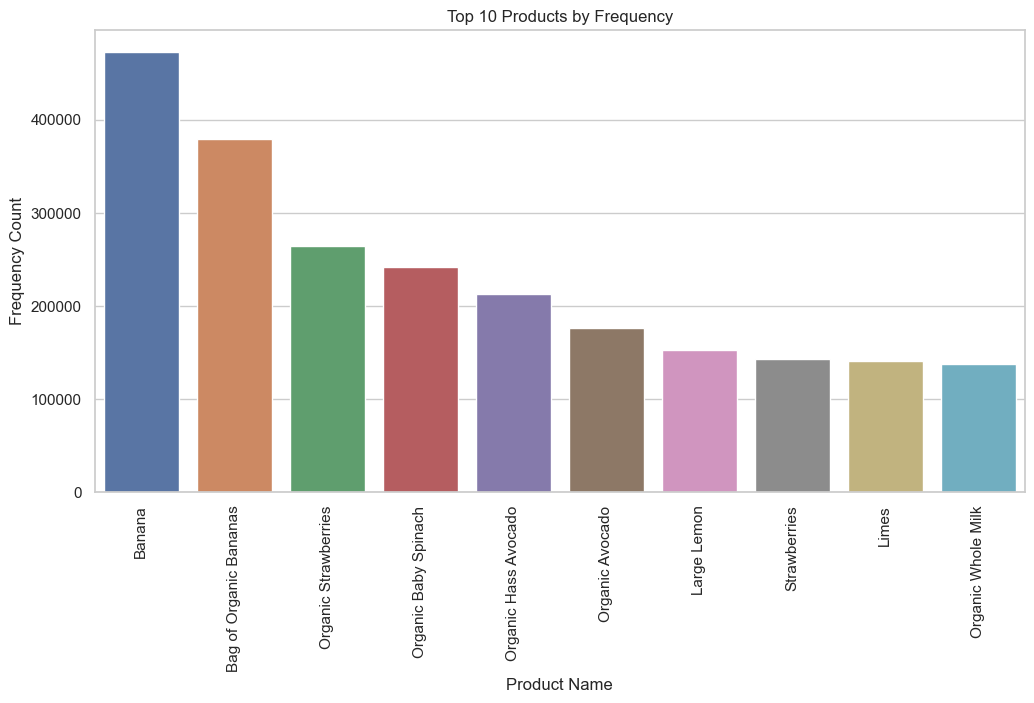

In [12]:
#Top 10 Products by Frequency

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.barplot(data=top_product_frequency_count,x='product_name',y='frequency_count')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Frequency Count')
plt.title('Top 10 Products by Frequency')

# Display the plot
plt.show()

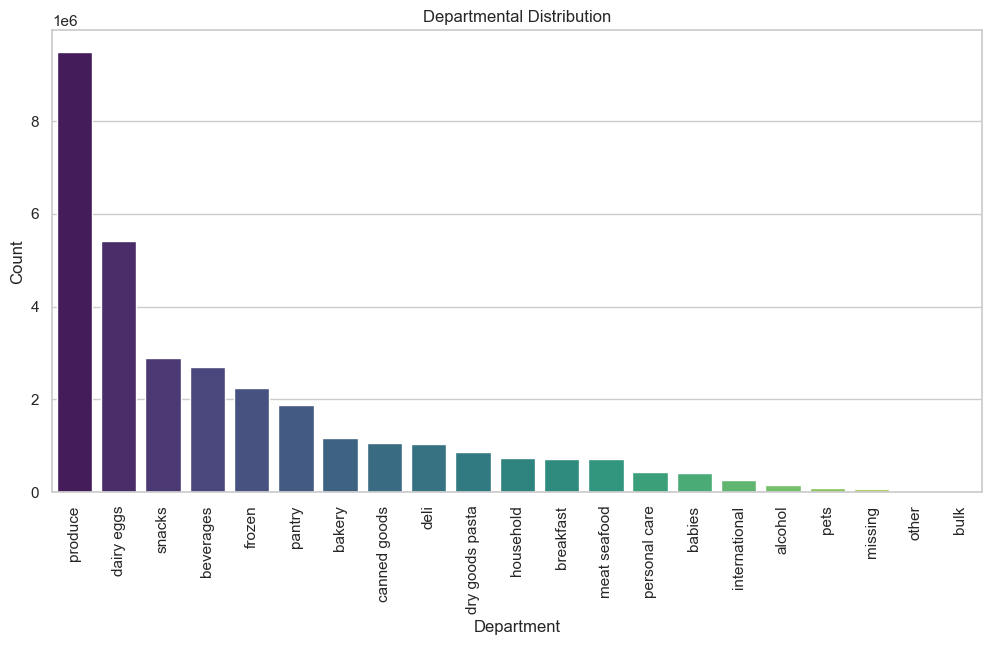

In [13]:
#countplot for seeing the departmental distribution

plt.figure(figsize=(12,6))
sns.countplot(data=df_order_products,x='department',order=df_order_products['department'].value_counts().index,palette='viridis')

plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Departmental Distribution')

# Display the plot
plt.show()

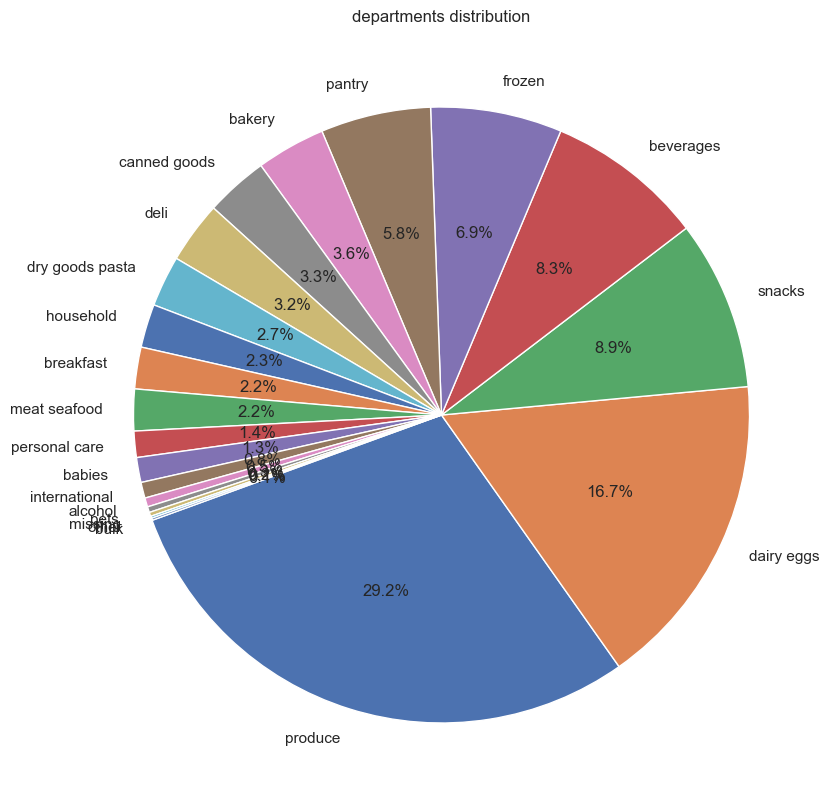

In [36]:
plt.figure(figsize=(10,10))
dept_dist=df_order_products['department'].value_counts()
labels=(np.array(dept_dist.index))
sizes=(np.array(dept_dist/dept_dist.sum()*100))
plt.pie(sizes,labels=labels,autopct="%1.1f%%",startangle=200)
plt.title('departments distribution')
plt.show()

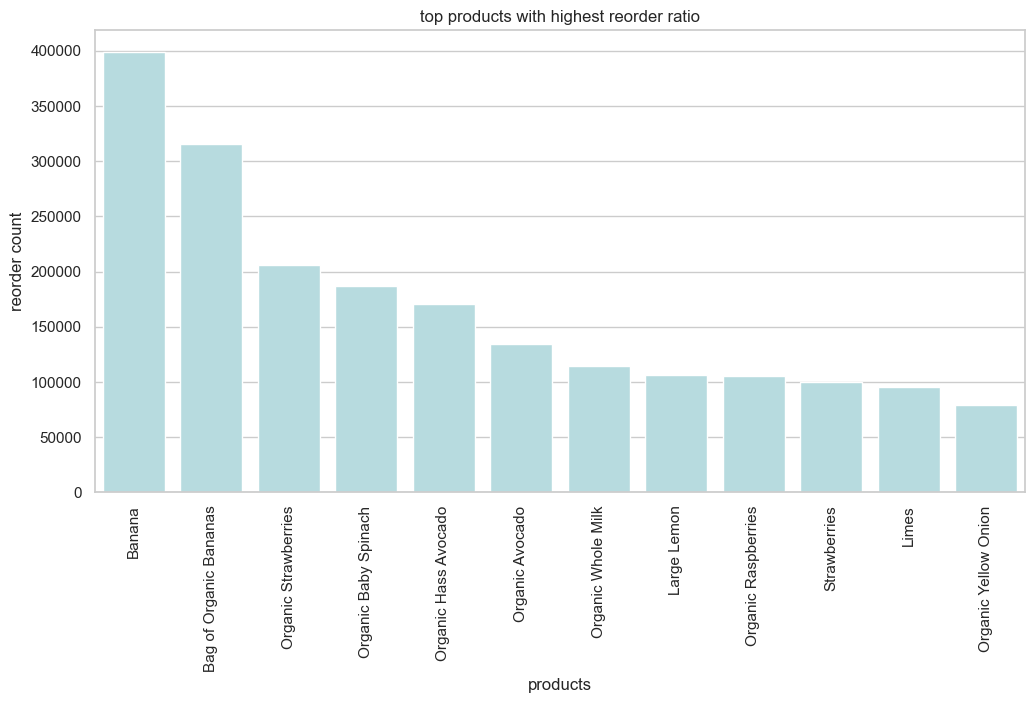

In [14]:
#

top_reorder_products=df_order_products[df_order_products['reordered']==1]['product_name'].value_counts().sort_values(ascending=False)[:12]
plt.figure(figsize=(12,6))
sns.barplot(x=top_reorder_products.index,y=top_reorder_products.values,color='powderblue')

plt.xticks(rotation=90)
plt.xlabel('products')
plt.ylabel('reorder count')
plt.title('top products with highest reorder ratio')

# Display the plot
plt.show()

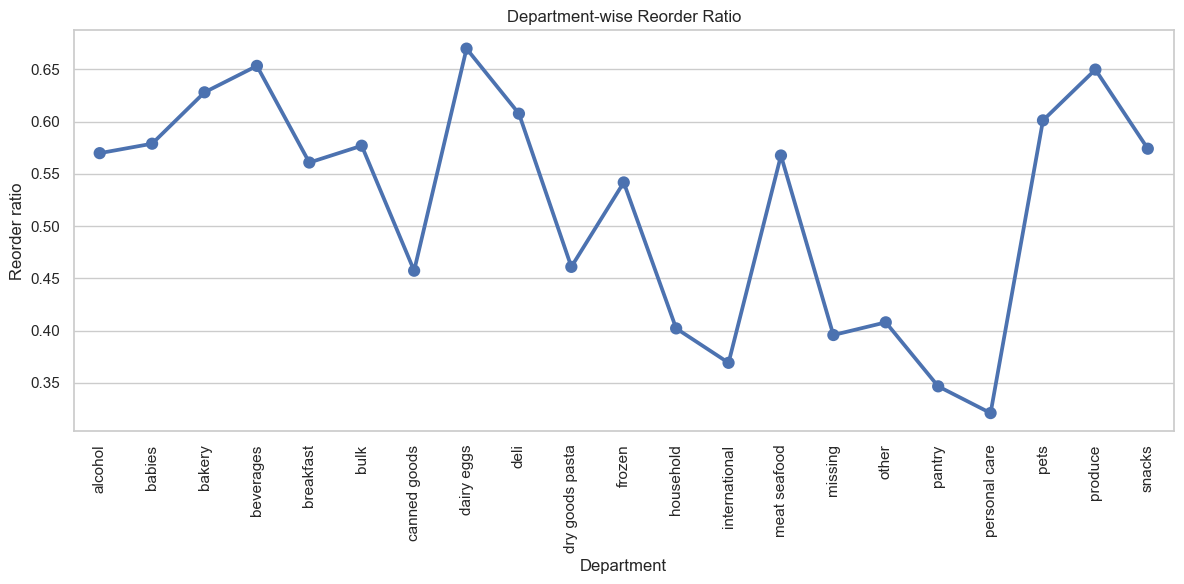

In [15]:
grouped_df = df_order_products.groupby(["department"])["reordered"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.pointplot(x='department', y='reordered', data=grouped_df, color='b')

plt.xlabel('Department', fontsize=12)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xticks(rotation=90)
plt.title('Department-wise Reorder Ratio')

plt.tight_layout()
plt.show()

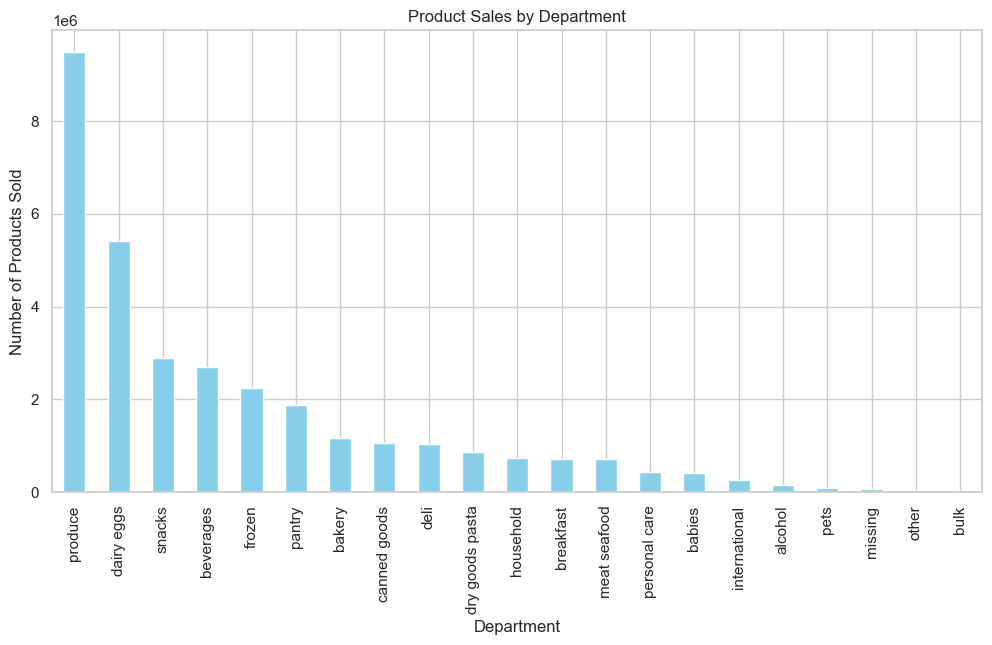

In [16]:
plt.figure(figsize=(12,6))
df_order_products['department'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Product Sales by Department')
plt.xlabel('Department')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=90)
plt.show()

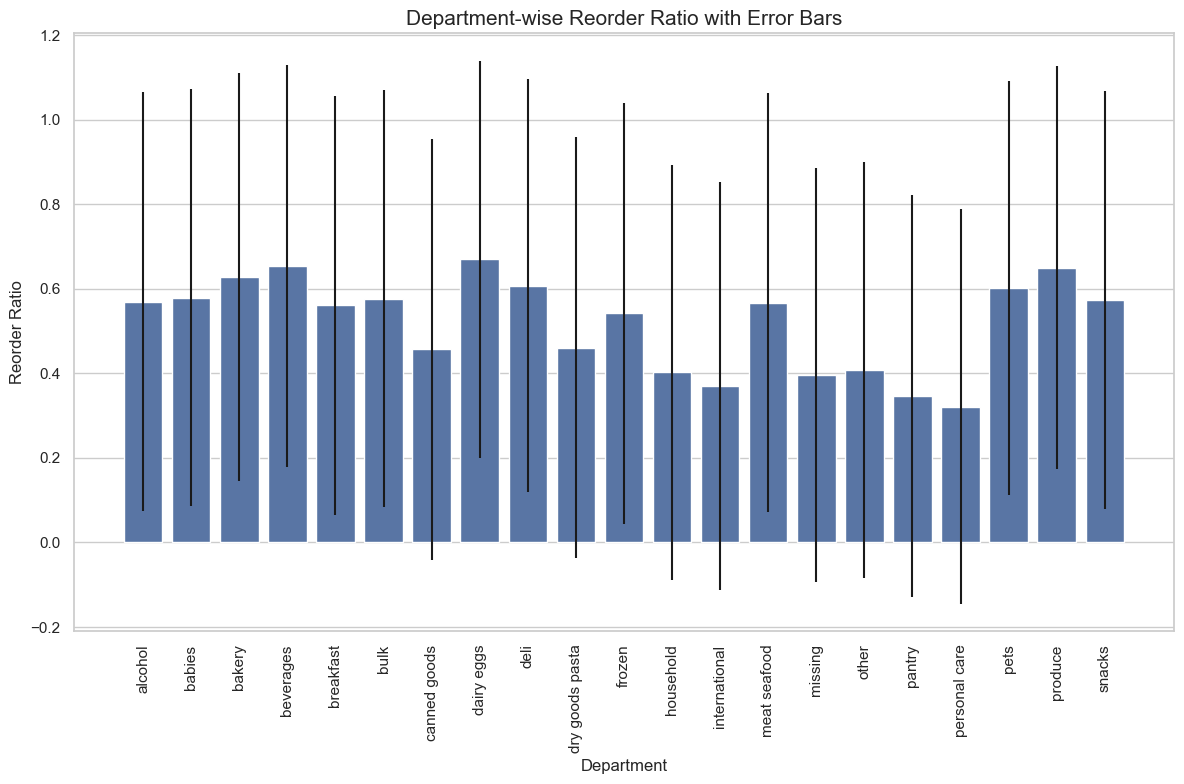

In [17]:
grouped_df = df_order_products.groupby(["department"])["reordered"].mean().reset_index()
grouped_df['reordered_std'] = df_order_products.groupby(["department"])["reordered"].std().reset_index()["reordered"]

plt.figure(figsize=(12, 8))
sns.barplot(x='department', y='reordered', data=grouped_df, color='b')
plt.errorbar(x=grouped_df['department'], y=grouped_df['reordered'], yerr=grouped_df['reordered_std'], fmt='none', color='k')
plt.ylabel('Reorder Ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title('Department-wise Reorder Ratio with Error Bars', fontsize=15)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


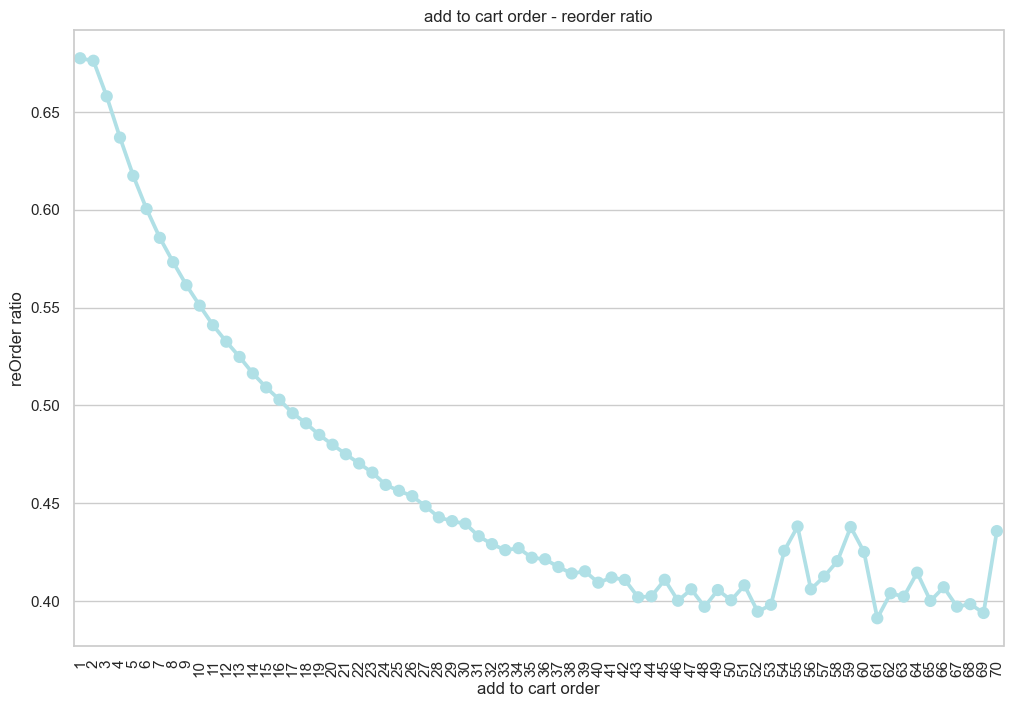

In [48]:
df_order_products["add_to_cart_order_mod"]=df_order_products["add_to_cart_order"].copy()
df_order_products.loc[df_order_products["add_to_cart_order_mod"]>70, "add_to_cart_order_mod"]=70
grouped_df=df_order_products.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df["add_to_cart_order_mod"].values , y = grouped_df['reordered'].values, color='powderblue', markers='o', linestyles='-')
plt.xticks(rotation=90)
plt.ylabel('reOrder ratio')
plt.xlabel('add to cart order')
plt.title('add to cart order - reorder ratio')
plt.show()


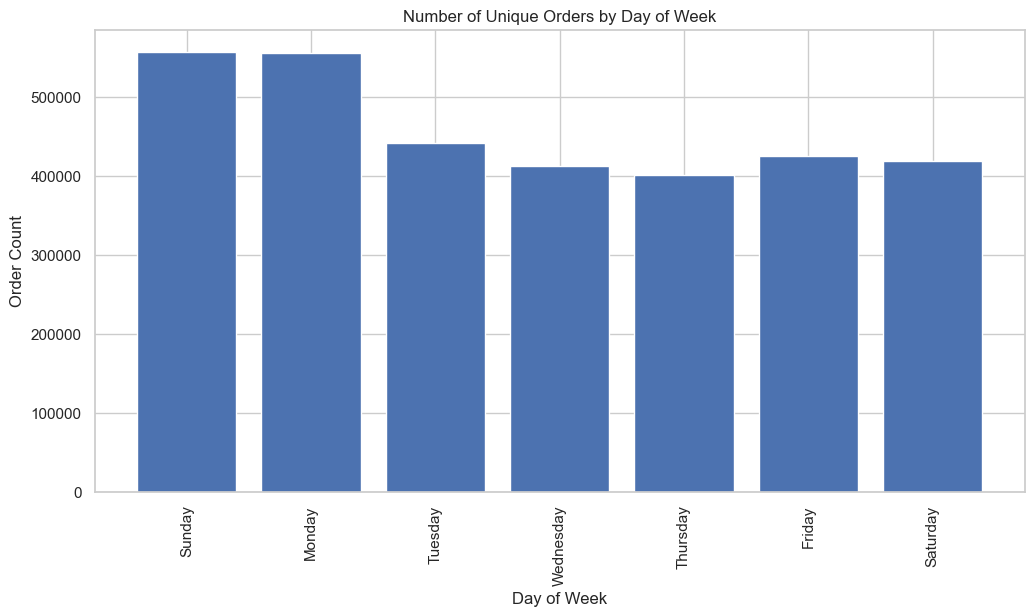

In [49]:
weekday_names = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Calculate the number of unique orders for each day of the week
orders_per_day = df_order_products.groupby('order_dow')['order_id'].apply(lambda x: len(x.unique()))

# Map numerical day of the week codes to week names
weekdays = [weekday_names[day] for day in orders_per_day.index]

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(weekdays, orders_per_day)
plt.xticks(rotation='vertical')
plt.ylabel('Order Count')
plt.xlabel('Day of Week')
plt.title('Number of Unique Orders by Day of Week')
plt.show()


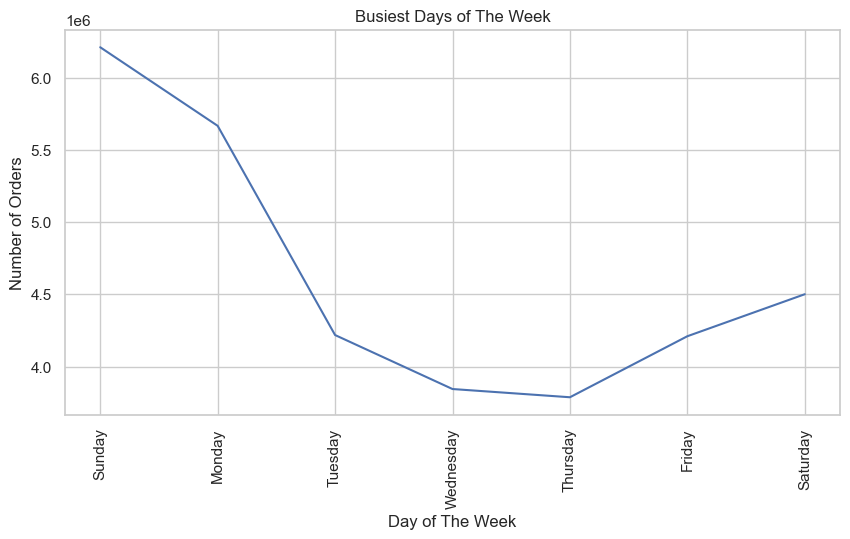

In [50]:
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
busiest_days = df_order_products['order_dow'].map(weekday_map).value_counts().loc[weekday_map.values()]

# Visualization
plt.figure(figsize=(10,5))
sns.lineplot(x=busiest_days.index, y=busiest_days.values)
plt.title('Busiest Days of The Week')
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Day of The Week', fontsize=12)
plt.xticks(rotation='vertical')  # Add this line if the weekday labels are overlapping
plt.show()

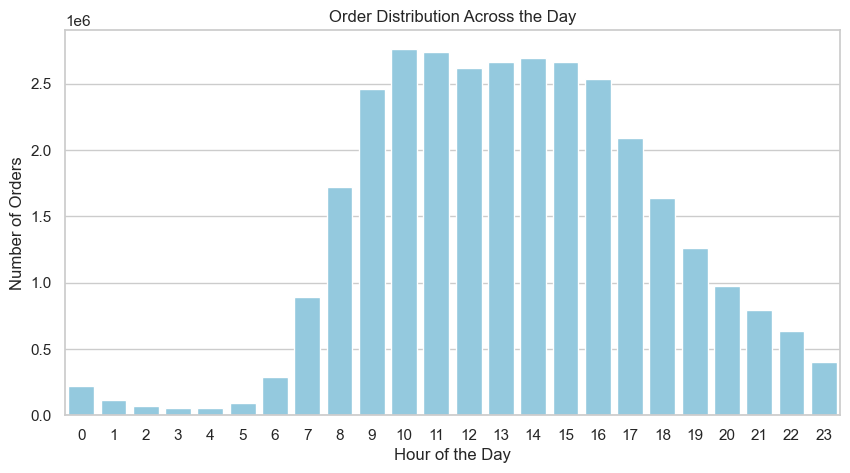

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='order_hour_of_day', data=df_order_products, color='skyblue')
plt.title('Order Distribution Across the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

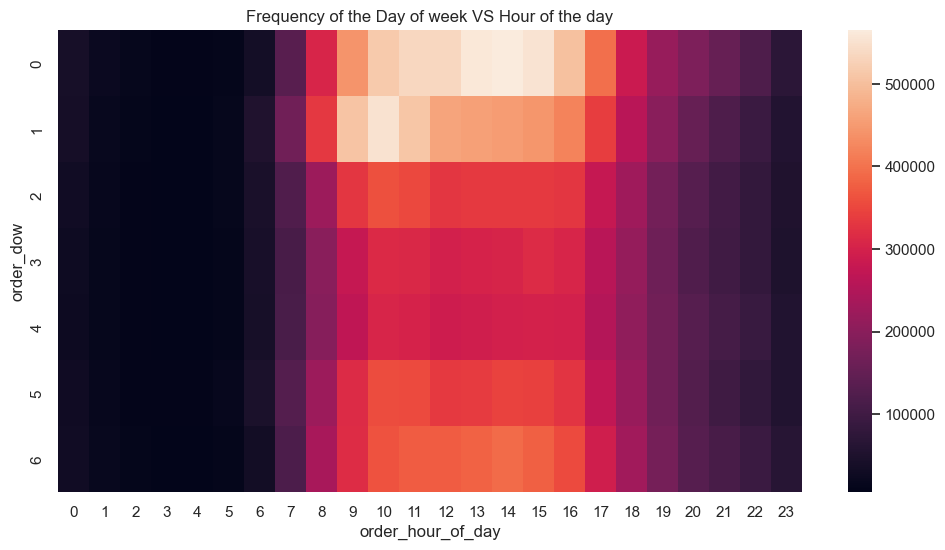

In [51]:
grp_df=df_order_products.groupby(["order_dow","order_hour_of_day"])['order_number'].aggregate("count").reset_index()
grp_df=grp_df.pivot(index="order_dow",columns="order_hour_of_day",values="order_number")

plt.figure(figsize=(12, 6))
sns.heatmap(grp_df)
plt.title("Frequency of the Day of week VS Hour of the day")
plt.show()

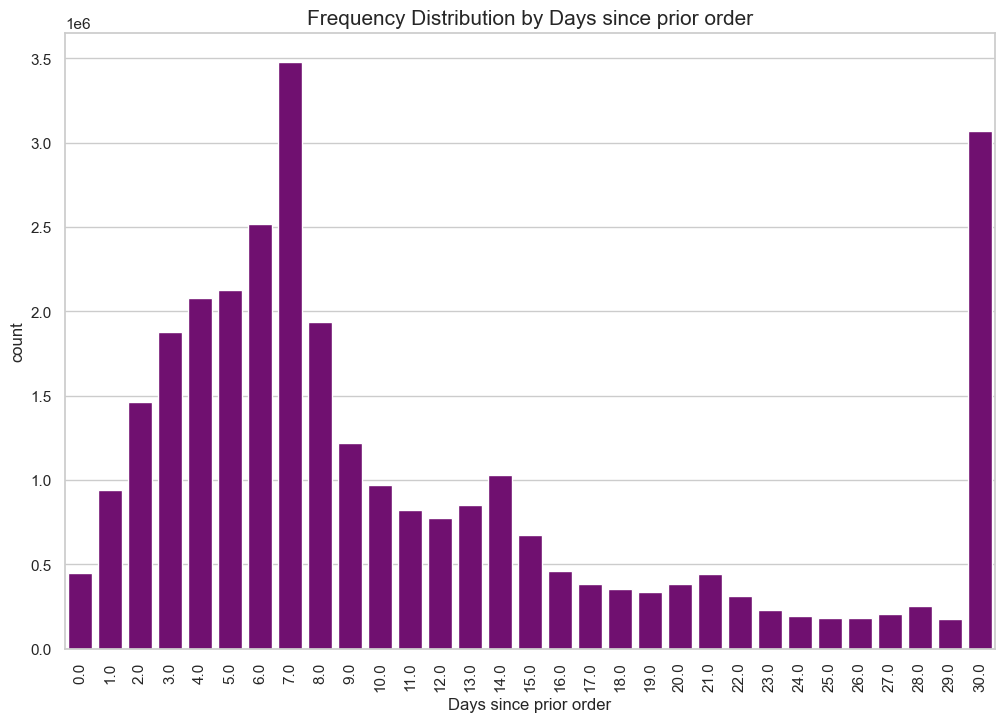

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=df_order_products, color="purple")
plt.title('Frequency Distribution by Days since prior order',fontsize=15)
plt.xlabel('Days since prior order')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

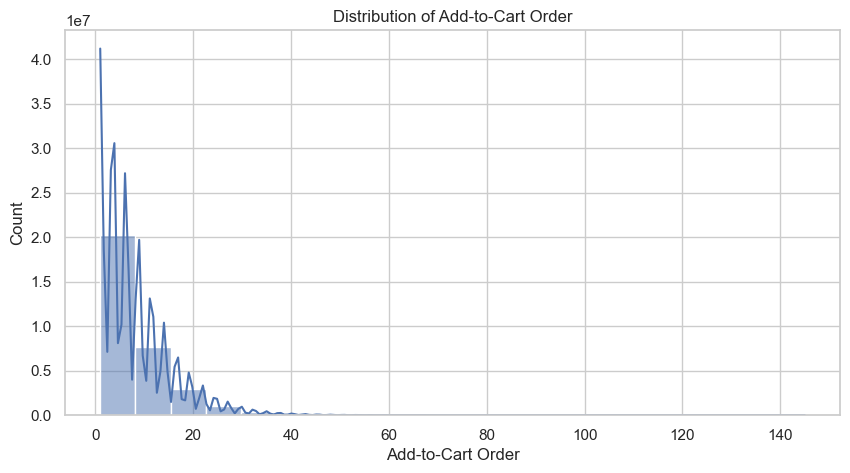

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_order_products, x='add_to_cart_order', bins=20, kde=True)
plt.title('Distribution of Add-to-Cart Order')
plt.xlabel('Add-to-Cart Order')
plt.ylabel('Count')
plt.show()

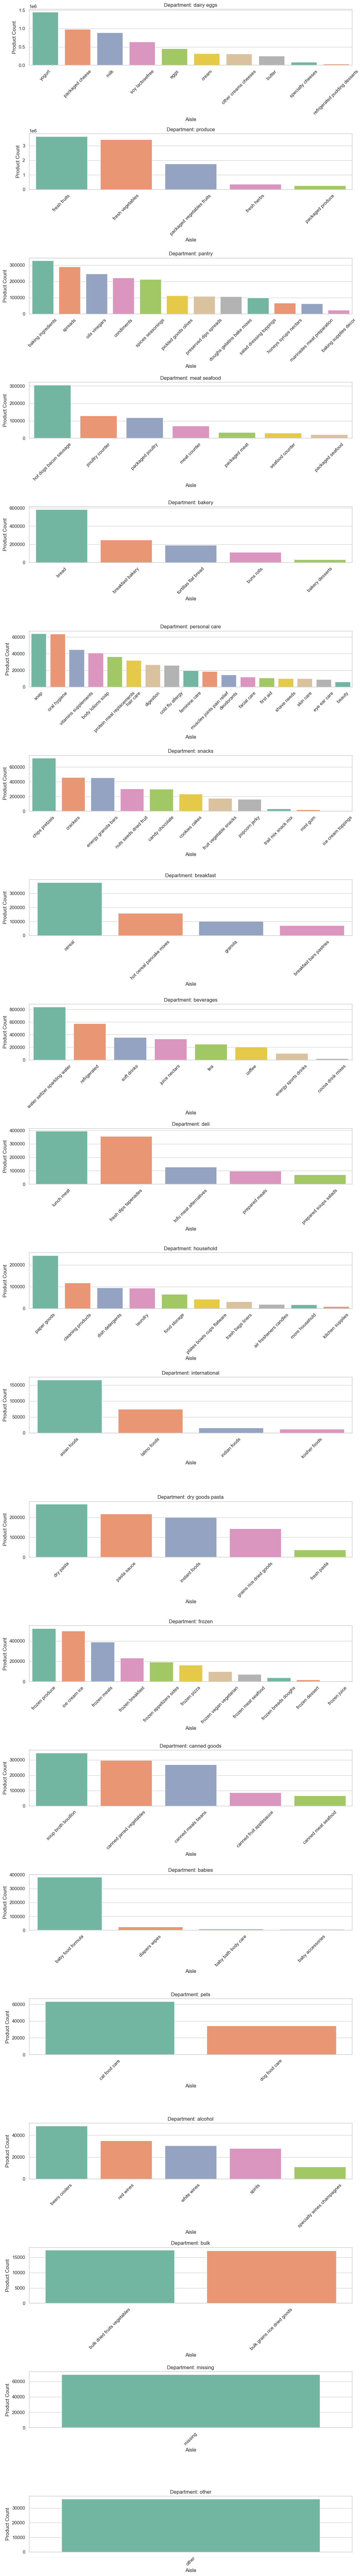

In [54]:
colors = sns.color_palette("Set2") 

# Get the unique departments
unique_departments = df_order_products['department'].unique()
num_rows = len(unique_departments)

# Plot departments volume, split by aisles
fig, axes = plt.subplots(num_rows, 1, figsize=(12, num_rows*4))
for i, department in enumerate(unique_departments):
    ax = axes[i]
    department_df = df_order_products[df_order_products['department'] == department]
    aisle_counts = department_df['aisle'].value_counts().sort_values(ascending=False)
    sns.barplot(x=aisle_counts.index, y=aisle_counts.values, ax=ax, palette=colors)
    ax.set_title(f'Department: {department}')
    ax.set_xlabel('Aisle')
    ax.set_ylabel('Product Count')
    ax.set_xticklabels(aisle_counts.index, rotation=45)
plt.tight_layout()

# Display the plots
plt.show()

In [9]:
#apriori algo 
product_counts = df_order_products.groupby('product_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
product_counts = product_counts.sort_values('frequency', ascending=False)[0:100].reset_index(drop=True)
product_counts.head(10)


,product_id,frequency
0,24852,472565
1,13176,379450
2,21137,264683
3,21903,241921
4,47209,213584
5,47766,176815
6,47626,152657
7,16797,142951
8,26209,140627
9,27845,137905


In [10]:
freq_products = list(product_counts.product_id)
freq_products[1:10]

[13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845]

In [12]:
order_products = df_order_products[df_order_products.product_id.isin(freq_products)]
order_products.shape


(7483881, 15)

In [14]:
basket = order_products.pivot_table(columns='product_name', values='reordered', index='order_id').reset_index().fillna(0).set_index('order_id')

In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket = basket.applymap(encode_units)
basket.head()

product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,...,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
shortbasket = basket[:100000]


In [60]:
frequent_items = apriori(shortbasket, min_support=0.01, use_colnames=True)
frequent_items.head()

C:\Users\Khyati\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.01270,(100% Raw Coconut Water)
1,0.01917,(100% Whole Wheat Bread)
2,0.01235,(2% Reduced Fat Milk)
3,0.02678,(Apple Honeycrisp Organic)
4,0.01738,(Asparagus)


In [61]:
rules = association_rules(frequent_items, metric='lift', min_threshold=1).reset_index()
rules.sort_values('lift', ascending=False)

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,29,(Organic Strawberries),(Organic Raspberries),0.08810,0.04394,0.01032,0.117140,2.665899,0.006449,1.082912,0.685264
28,28,(Organic Raspberries),(Organic Strawberries),0.04394,0.08810,0.01032,0.234866,2.665899,0.006449,1.191817,0.653612
14,14,(Banana),(Organic Fuji Apple),0.17149,0.02710,0.01078,0.062861,2.319587,0.006133,1.038160,0.686641
15,15,(Organic Fuji Apple),(Banana),0.02710,0.17149,0.01078,0.397786,2.319587,0.006133,1.375773,0.584735
4,4,(Organic Raspberries),(Bag of Organic Bananas),0.04394,0.13489,0.01322,0.300865,2.230446,0.007293,1.237400,0.577013
5,5,(Bag of Organic Bananas),(Organic Raspberries),0.13489,0.04394,0.01322,0.098006,2.230446,0.007293,1.059940,0.637675
2,2,(Organic Hass Avocado),(Bag of Organic Bananas),0.07202,0.13489,0.02110,0.292974,2.171949,0.011385,1.223590,0.581461
3,3,(Bag of Organic Bananas),(Organic Hass Avocado),0.13489,0.07202,0.02110,0.156424,2.171949,0.011385,1.100055,0.623717
26,26,(Organic Hass Avocado),(Organic Strawberries),0.07202,0.08810,0.01282,0.178006,2.020501,0.006475,1.109376,0.544272
27,27,(Organic Strawberries),(Organic Hass Avocado),0.08810,0.07202,0.01282,0.145516,2.020501,0.006475,1.086013,0.553869


In [28]:
#pca cusstomer segmentation
df_order_products['product_name'].value_counts()[0:11]

product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Organic Raspberries       137057
Name: count, dtype: int64

In [29]:
len(df_order_products['product_name'].unique())

49677

In [30]:
data_order_products.shape

(32434489, 4)

In [31]:
len(df_order_products['aisle'].unique())

134

In [32]:
df_order_products['aisle'].value_counts()[0:10]

aisle
fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: count, dtype: int64

In [35]:
cust_prod = pd.crosstab(df_order_products['user_id'], df_order_products['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [36]:
cust_prod.shape

(206209, 134)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [38]:
type(pca_samples)

numpy.ndarray

In [40]:
ps=pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-24.215659,2.429427,-2.466369,-0.145677,0.268996,-1.432727
1,6.463208,36.751116,8.382553,15.097521,-6.920922,-0.978414
2,-7.990302,2.404383,-11.030065,0.672215,-0.442340,-2.823267
3,-27.991129,-0.755823,-1.921732,2.091888,-0.288232,0.926176
4,-19.896394,-2.637225,0.533229,3.679224,0.612834,-1.624026


(206209, 2)
          4          1
0  0.268996   2.429427
1 -6.920922  36.751116
2 -0.442340   2.404383
3 -0.288232  -0.755823
4  0.612834  -2.637225


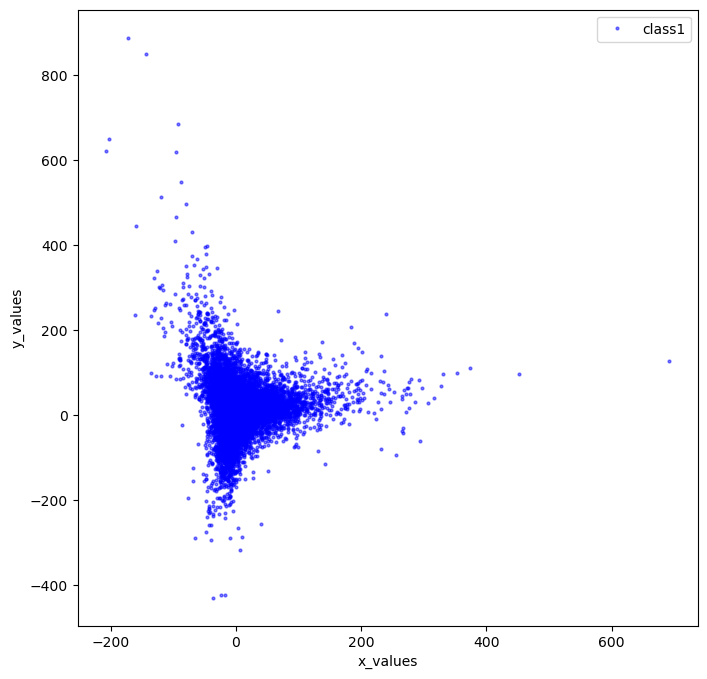

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

C:\Users\Khyati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ -4.71201795 -40.617772  ]
 [ -0.11856332   0.09813797]
 [-11.2756139   65.26938505]
 [ 76.82338779  26.26358548]]


In [43]:
print (c_preds[0:100])

[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 2 1 1 1 1 1 1 1 1 1 1]


['blue', 'purple', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


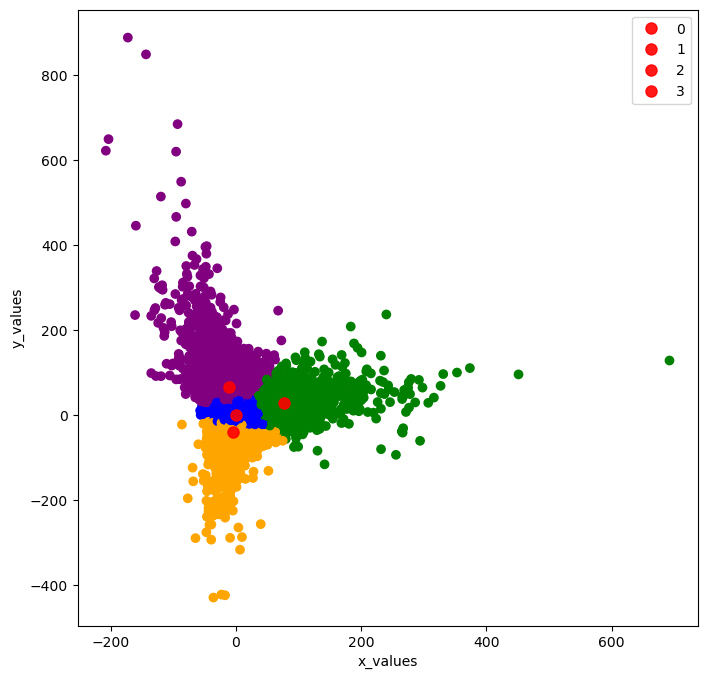

In [46]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [47]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,2
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,5,1
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,2,0,19,1


(206209, 135)


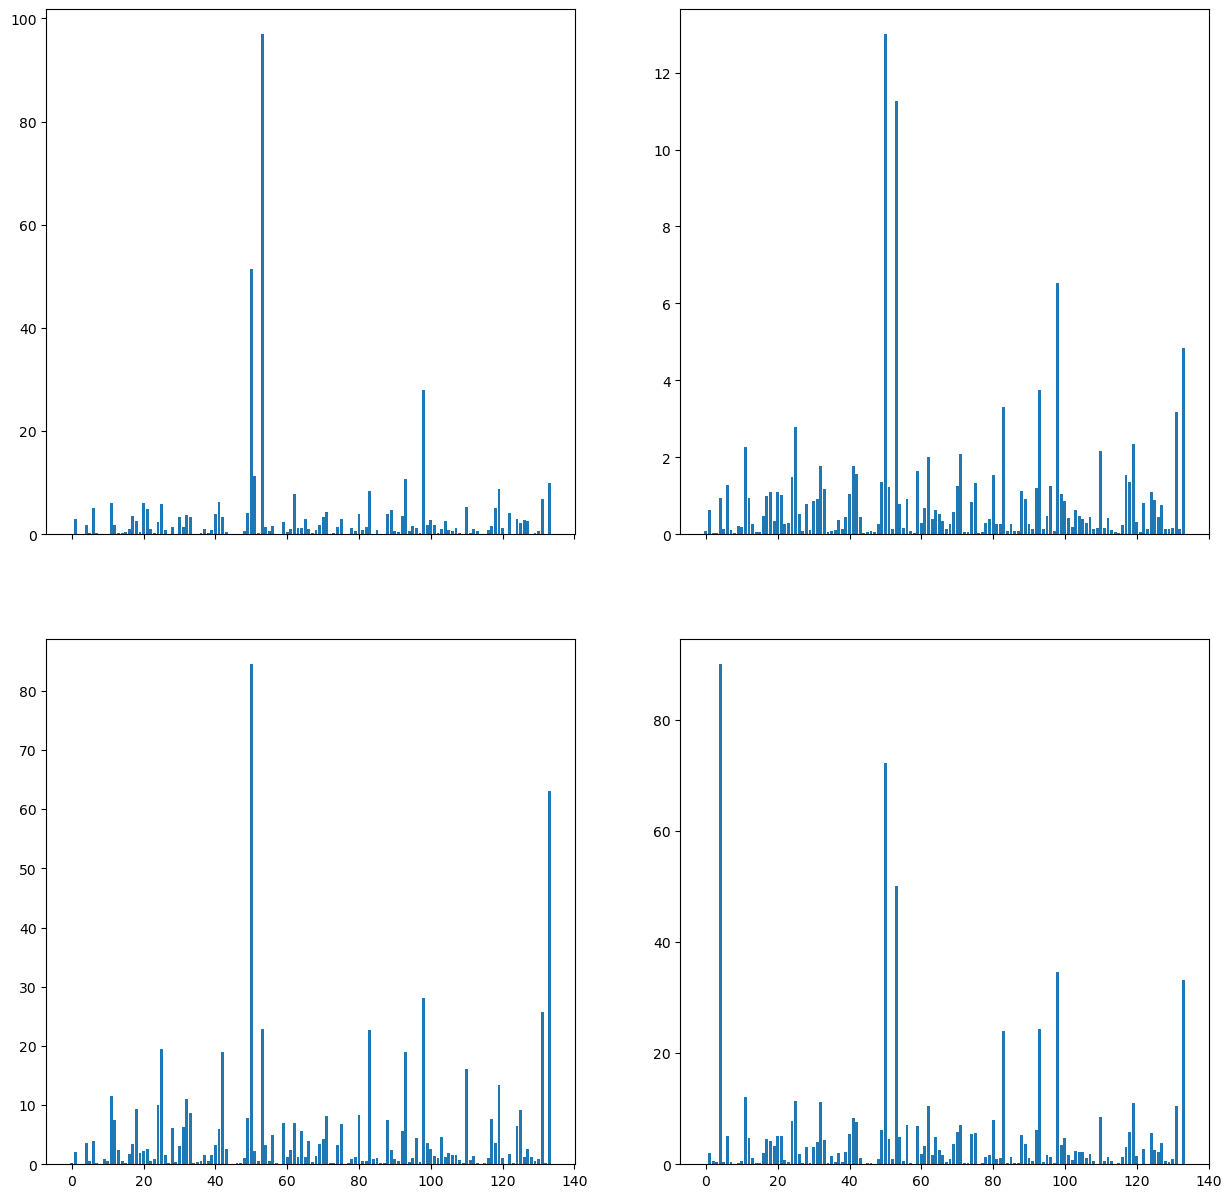

In [48]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

In [49]:
c0.sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 96.918109
fresh fruits                     51.413042
packaged vegetables fruits       27.918020
fresh herbs                      11.316262
packaged cheese                  10.643825
yogurt                            9.924478
soy lactosefree                   8.803480
milk                              8.358597
frozen produce                    7.813526
water seltzer sparkling water     6.775226
dtype: float64

In [50]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     12.996364
fresh vegetables                 11.262384
packaged vegetables fruits        6.531656
yogurt                            4.839576
packaged cheese                   3.754687
milk                              3.303029
water seltzer sparkling water     3.168892
chips pretzels                    2.782640
soy lactosefree                   2.349516
bread                             2.279327
dtype: float64

In [51]:
c2.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     84.496210
yogurt                           63.002190
packaged vegetables fruits       28.143675
water seltzer sparkling water    25.790130
fresh vegetables                 22.901129
milk                             22.736567
chips pretzels                   19.465723
packaged cheese                  19.050362
energy granola bars              19.035540
refrigerated                     16.017854
dtype: float64

In [52]:
c3.sort_values(ascending=False)[0:10]

aisle
baby food formula             90.031453
fresh fruits                  72.334056
fresh vegetables              50.059111
packaged vegetables fruits    34.557484
yogurt                        33.242950
packaged cheese               24.305315
milk                          23.996746
bread                         12.200651
chips pretzels                11.457701
crackers                      11.247831
dtype: float64

In [53]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,51.413042,96.918109,27.918020,9.924478,10.643825,8.358597,6.775226,5.798188
1,12.996364,11.262384,6.531656,4.839576,3.754687,3.303029,3.168892,2.782640
2,84.496210,22.901129,28.143675,63.002190,19.050362,22.736567,25.790130,19.465723
3,72.334056,50.059111,34.557484,33.242950,24.305315,23.996746,10.527657,11.457701


In [54]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,23.611097,44.508996,12.821164,4.557750,4.888106,3.838630,3.111478,2.662779
1,26.719922,23.154940,13.428782,9.949945,7.719462,6.790875,6.515096,5.720979
2,29.586960,8.018996,9.854712,22.060673,6.670622,7.961374,9.030601,6.816064
3,27.769415,19.217949,13.266795,12.762139,9.330935,9.212474,4.041622,4.398670


In [55]:
c0.sort_values(ascending=False)[10:15]

aisle
eggs                        6.178222
canned jarred vegetables    6.099560
bread                       6.015696
chips pretzels              5.798188
refrigerated                5.280653
dtype: float64

In [56]:
c1.sort_values(ascending=False)[10:15]

aisle
refrigerated      2.168844
ice cream ice     2.082732
frozen produce    2.001330
eggs              1.778021
crackers          1.765847
dtype: float64

In [57]:
c2.sort_values(ascending=False)[10:15]

aisle
soy lactosefree    13.440795
bread              11.520465
crackers           11.005221
cereal              9.975408
candy chocolate     9.355398
dtype: float64

In [58]:
c3.sort_values(ascending=False)[10:15]

aisle
soy lactosefree                  11.003254
frozen produce                   10.577007
water seltzer sparkling water    10.527657
refrigerated                      8.530369
eggs                              8.318330
dtype: float64